In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [ ]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting
from google.colab import files
import io

In [ ]:
#Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
bikeDataRaw = pd.read_csv("https://raw.githubusercontent.com/dudemandando/Data/main/SeoulBikeData.csv", encoding= 'unicode_escape')
bikeDataRaw.head(10)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print("Columns: ", bikeDataRaw.columns)
print("Check For Null Values: ", bikeDataRaw.isnull().values.any())


Columns:  Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
Check For Null Values:  False


In [ ]:
#Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall 

#newColumns = ["Date","Rented Bike Count","Hour","Temperature(C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)","Seasons","Holiday","Functioning Day"]
#bikeDataRaw.set_axis(newColumns, axis=1, inplace=False)

In [ ]:
bikeDataRaw.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
print("Data Types: ", bikeDataRaw.dtypes)

Data Types:  Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


In [ ]:
bikeDataRaw['Seasons'] = bikeDataRaw['Seasons'].astype('category')
bikeDataRaw['Holiday'] = bikeDataRaw['Holiday'].astype('category')
bikeDataRaw['Functioning Day'] = bikeDataRaw['Functioning Day'].astype('category')
bikeDataRaw['Date'] = pd.to_datetime(bikeDataRaw['Date'])
print("Data Types: ", bikeDataRaw.dtypes)
bikeDataRaw.describe(include='all').T

Data Types:  Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                            category
Holiday                            category
Functioning Day                    category
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,8760,365,2017-01-12 00:00:00,24,2017-01-12,2018-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,NaT,NaT,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,NaT,NaT,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,NaT,NaT,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,NaT,NaT,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,NaT,NaT,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,NaT,NaT,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,NaT,NaT,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,NaT,NaT,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,NaT,NaT,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
refinBikes = bikeDataRaw
refinBikes["Year"] = bikeDataRaw['Date'].dt.year
refinBikes["Month"] = bikeDataRaw['Date'].dt.month
refinBikes["Day"] = bikeDataRaw['Date'].dt.day 
refinBikes["WeekDay"] = bikeDataRaw['Date'].dt.day_name()
refinBikes["WeekDay"] = refinBikes["WeekDay"].astype("category")

refinBikes.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                            category
Holiday                            category
Functioning Day                    category
Year                                  int64
Month                                 int64
Day                                   int64
WeekDay                            category
dtype: object

In [ ]:

#refinBikes['Functioning Day']=refinBikes['Functioning Day'].map({'Yes':1,'No':0})
#refinBikes['Functioning Day']=refinBikes['Functioning Day'].map({'Yes':1,'No':0})

In [ ]:
refinBikes.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                            category
Holiday                            category
Functioning Day                    category
Year                                  int64
Month                                 int64
Day                                   int64
WeekDay                            category
dtype: object

In [ ]:
refinBikes=refinBikes[refinBikes['Functioning Day']!=0]
refinBikesNum = refinBikes.select_dtypes(include=[np.number])

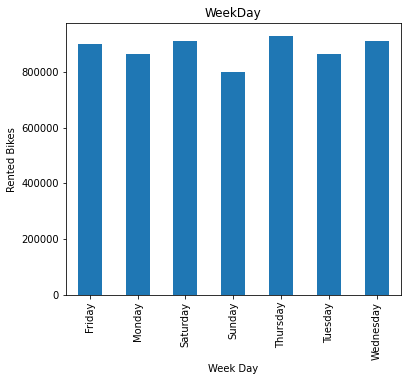

In [ ]:
bikePerTime = refinBikes

#bikePerTime.columns = ['WeekDay','Month', 'Year','Day', 'Hour', 'RentedBikeCount']

bikePerTime.groupby(['WeekDay'])['Rented Bike Count'].sum().plot(kind='bar', title='WeekDay', ylabel='Rented Bikes',
         xlabel='Week Day', figsize=(6, 5))





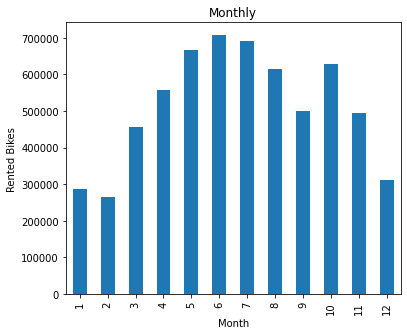

In [ ]:
bikePerTime.groupby(['Month'])['Rented Bike Count'].sum().plot(kind='bar', title='Monthly', ylabel='Rented Bikes',
         xlabel='Month', figsize=(6, 5))

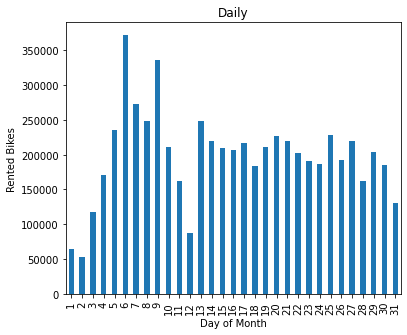

In [ ]:
bikePerTime.groupby(['Day'])['Rented Bike Count'].sum().plot(kind='bar', title='Daily', ylabel='Rented Bikes',
         xlabel='Day of Month', figsize=(6, 5))

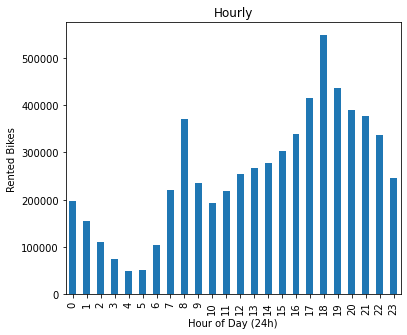

In [ ]:
bikePerTime.groupby(['Hour'])['Rented Bike Count'].sum().plot(kind='bar', title='Hourly', ylabel='Rented Bikes',
         xlabel='Hour of Day (24h)', figsize=(6, 5))

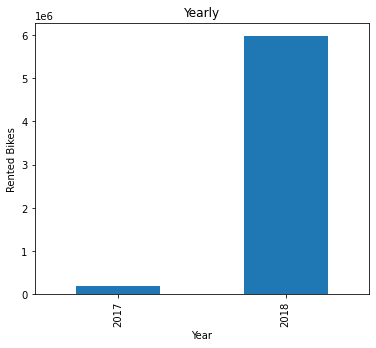

In [ ]:
bikePerTime.groupby(['Year'])['Rented Bike Count'].sum().plot(kind='bar', title='Yearly', ylabel='Rented Bikes',
         xlabel='Year', figsize=(6, 5))

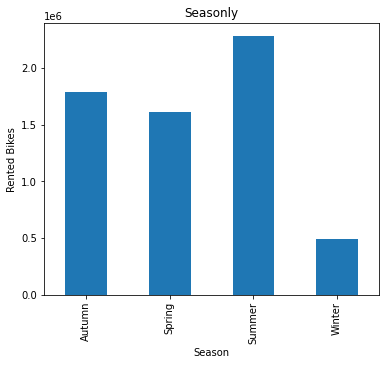

In [ ]:
bikePerTime.groupby(['Seasons'])['Rented Bike Count'].sum().plot(kind='bar', title='Seasonly', ylabel='Rented Bikes',
         xlabel='Season', figsize=(6, 5))

In [ ]:
bikePerTime.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*bikePerTime.columns]]
bikePerTime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_Speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_Point_Temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   category      
 12  Holiday                8760 non-null   category      
 13  Fun

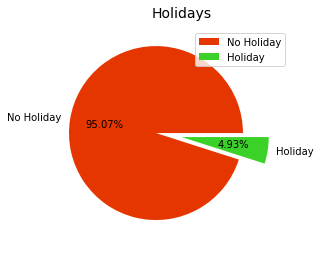

In [ ]:
plt.pie(bikePerTime.Holiday.value_counts(),
        labels=bikePerTime.Holiday.unique(),
        explode=[0.3,0],
        autopct='%1.2f%%',
        colors=["#e63600","#3bd128"])

plt.title("Holidays", y=1.02, fontsize=14)
plt.legend()
plt.show()

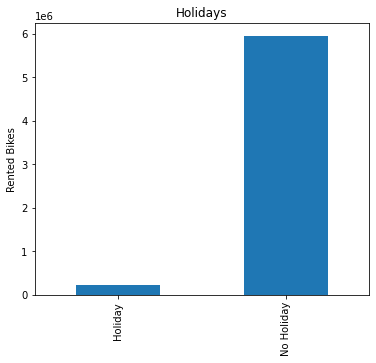

In [ ]:
bikePerTime.groupby(['Holiday'])['Rented_Bike_Count'].sum().plot(kind='bar', title='Holidays', ylabel='Rented Bikes',
         xlabel='', figsize=(6, 5))

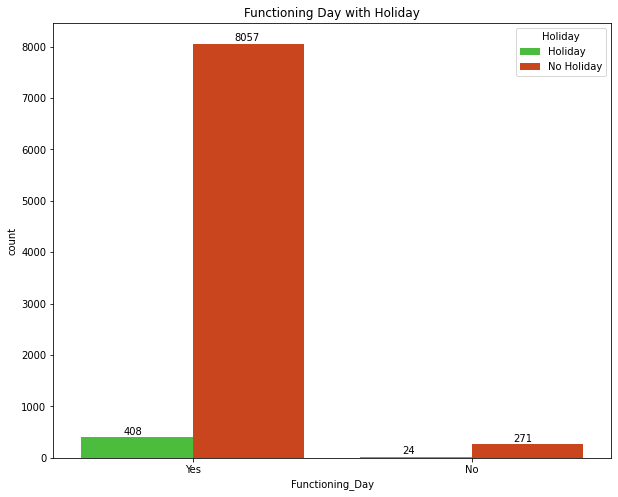

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Functioning Day with Holiday')
plt.xlabel('Functioning Day values')
plt.ylabel('count (Y)')

ax = sns.countplot(x= "Functioning_Day",
              data=bikePerTime,
              order=["Yes", "No"],
              hue="Holiday",
              palette=["#3bd128","#e63600"])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.show()

In [ ]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting
from google.colab import files
import io
import xgboost as xgb


In [ ]:
bikePerTime.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


In [ ]:
bikes = bikePerTime
 # Now let's extract all the values stored in the date variable 
bikes['year']       = bikes['Date'].apply(lambda x:x.year)
bikes['month']      = bikes['Date'].apply(lambda x:x.month)
bikes['dayofweek']  = bikes['Date'].apply(lambda x:x.dayofweek) #The day of the week with Monday=0, Sunday=6.
bikes['weekofyear'] = bikes['Date'].apply(lambda x:x.weekofyear)

print(bikes.shape)
bikes.dtypes

(8760, 22)


Date                     datetime64[ns]
Rented_Bike_Count                 int64
Hour                              int64
Temperature                     float64
Humidity                          int64
Wind_Speed                      float64
Visibility                        int64
Dew_Point_Temperature           float64
Solar_Radiation                 float64
Rainfall                        float64
Snowfall                        float64
Seasons                        category
Holiday                        category
Functioning_Day                category
Year                              int64
Month                             int64
Day                               int64
Weekday                        category
year                              int64
month                             int64
dayofweek                         int64
weekofyear                        int64
dtype: object

In [ ]:
bikes.to_csv('bikeDataClean.csv')

In [ ]:
bikes = pd.read_csv('https://raw.githubusercontent.com/dudemandando/Data/main/bikeDataClean.csv')
del bikes['Unnamed: 0']
bikes['Seasons'] = bikes['Seasons'].astype('category')
bikes['Holiday'] = bikes['Holiday'].astype('category')
bikes['Functioning_Day'] = bikes['Functioning_Day'].astype('category')
bikes['Weekday'] = bikes['Weekday'].astype('category')
bikes.dtypes

Date                       object
Rented_Bike_Count           int64
Hour                        int64
Temperature               float64
Humidity                    int64
Wind_Speed                float64
Visibility                  int64
Dew_Point_Temperature     float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Seasons                  category
Holiday                  category
Functioning_Day          category
Year                        int64
Month                       int64
Day                         int64
Weekday                  category
year                        int64
month                       int64
dayofweek                   int64
weekofyear                  int64
dtype: object

# **Encode Categorical Columns as Numerical**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
seasons_cat = bikes[['Seasons']]
holiday_cat = bikes[['Holiday']]
func_day_cat = bikes[['Functioning_Day']]
weekday_cat = bikes[['Weekday']]

seasons_encoder = OrdinalEncoder()

seasons_encoded = seasons_encoder.fit_transform(seasons_cat)
holiday_encoder = OrdinalEncoder()
holiday_encoded = holiday_encoder.fit_transform(holiday_cat)
func_day_encoder = OrdinalEncoder()
func_day_encoded = func_day_encoder.fit_transform(func_day_cat)
weekday_encoder = OrdinalEncoder()
weekday_encoded = weekday_encoder.fit_transform(weekday_cat)

np.unique(weekday_encoder)

array([OrdinalEncoder()], dtype=object)

In [ ]:
weekday_encoder.categories_


[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]